In [26]:
from IPython.display import Audio
from scipy.misc import face
from scipy.io import wavfile
from scipy import signal
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Section 1 - Images

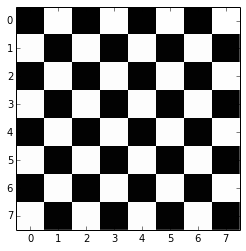

In [27]:
# For the following section, make a black and white chessboard
data = np.array(
    [
        [0, 1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 0],
    ],
    dtype=np.bool
)
plt.imshow(data, cmap="gray", interpolation='none')

[[[121 112 131]
  [138 129 148]
  [153 144 165]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]]]


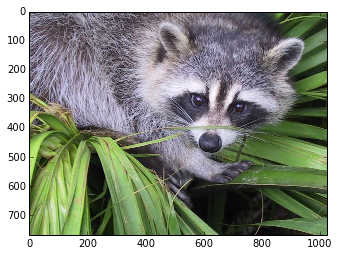

In [28]:
plt.imshow(face())
# Notice that each "item" of the data grid is now 3 values
# corresponding to Red, Green, and Blue values between 0 and 255
# The code below prints the top left corner, in a 3x3 region
print(face()[:3, :3, ...])

# Section 2 - Audio

Plays a simple A chord for 1 second

In [39]:
frequencies = [440, 554.37, 659.25]
samplerate = 44100

samples = np.asarray([np.sin(np.linspace(0, 2 * np.pi * frequency * 5, samplerate * 5)) for frequency in frequencies])
Audio(np.sum(samples, axis=0), rate=samplerate)

In [30]:
datarate = samplerate
data = np.sum(samples, axis=0)

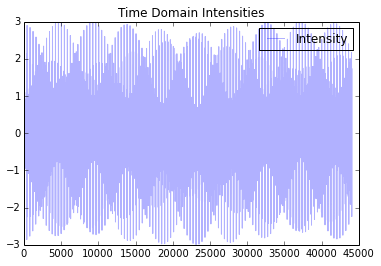

In [31]:
plt.plot(range(len(data)), data, label="Intensity", alpha=0.3)
plt.title("Time Domain Intensities")
plt.legend()

To visualize the frequencies of the piece, we will convert 0.1s "chunks" of the song into the frequency domain.

In [32]:
chunks_second = 1
num_chunks = int(chunks_second * len(data) / datarate)
chunks = [data[datarate / chunks_second * i : datarate / chunks_second * (i + 1)] for i in range(num_chunks)]
frequencies = np.asarray([np.abs(np.fft.rfft(chunk)) for chunk in chunks]).T[:1000]

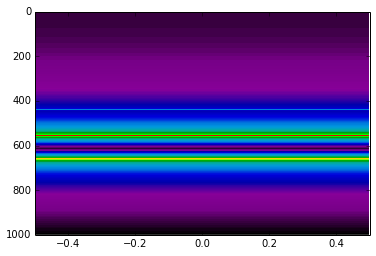

In [33]:
plt.imshow(20*np.log10(frequencies), interpolation="none", aspect="auto", cmap='spectral')

Now we can create a "flat" sounding rendition of a song using frequencies

In [65]:
frequency_table = {
 'A#0': 29.14,
 'A#1': 58.27,
 'A#2': 116.54,
 'A#3': 233.08,
 'A#4': 466.16,
 'A#5': 932.33,
 'A#6': 1864.66,
 'A#7': 3729.31,
 'A#8': 7458.62,
 'A0': 27.5,
 'A1': 55.0,
 'A2': 110.0,
 'A3': 220.0,
 'A4': 440.0,
 'A5': 880.0,
 'A6': 1760.0,
 'A7': 3520.0,
 'A8': 7040.0,
 'Ab0': 25.96,
 'Ab1': 51.91,
 'Ab2': 103.83,
 'Ab3': 207.65,
 'Ab4': 415.3,
 'Ab5': 830.61,
 'Ab6': 1661.22,
 'Ab7': 3322.44,
 'Ab8': 6644.88,
 'B0': 30.87,
 'B1': 61.74,
 'B2': 123.47,
 'B3': 246.94,
 'B4': 493.88,
 'B5': 987.77,
 'B6': 1975.53,
 'B7': 3951.07,
 'B8': 7902.13,
 'Bb0': 29.14,
 'Bb1': 58.27,
 'Bb2': 116.54,
 'Bb3': 233.08,
 'Bb4': 466.16,
 'Bb5': 932.33,
 'Bb6': 1864.66,
 'Bb7': 3729.31,
 'Bb8': 7458.62,
 'C#0': 17.32,
 'C#1': 34.65,
 'C#2': 69.3,
 'C#3': 138.59,
 'C#4': 277.18,
 'C#5': 554.37,
 'C#6': 1108.73,
 'C#7': 2217.46,
 'C#8': 4434.92,
 'C0': 16.35,
 'C1': 32.7,
 'C2': 65.41,
 'C3': 130.81,
 'C4': 261.63,
 'C5': 523.25,
 'C6': 1046.5,
 'C7': 2093.0,
 'C8': 4186.01,
 'D#0': 19.45,
 'D#1': 38.89,
 'D#2': 77.78,
 'D#3': 155.56,
 'D#4': 311.13,
 'D#5': 622.25,
 'D#6': 1244.51,
 'D#7': 2489.02,
 'D#8': 4978.03,
 'D0': 18.35,
 'D1': 36.71,
 'D2': 73.42,
 'D3': 146.83,
 'D4': 293.66,
 'D5': 587.33,
 'D6': 1174.66,
 'D7': 2349.32,
 'D8': 4698.63,
 'Db0': 17.32,
 'Db1': 34.65,
 'Db2': 69.3,
 'Db3': 138.59,
 'Db4': 277.18,
 'Db5': 554.37,
 'Db6': 1108.73,
 'Db7': 2217.46,
 'Db8': 4434.92,
 'E0': 20.6,
 'E1': 41.2,
 'E2': 82.41,
 'E3': 164.81,
 'E4': 329.63,
 'E5': 659.25,
 'E6': 1318.51,
 'E7': 2637.02,
 'E8': 5274.04,
 'Eb0': 19.45,
 'Eb1': 38.89,
 'Eb2': 77.78,
 'Eb3': 155.56,
 'Eb4': 311.13,
 'Eb5': 622.25,
 'Eb6': 1244.51,
 'Eb7': 2489.02,
 'Eb8': 4978.03,
 'F#0': 23.12,
 'F#1': 46.25,
 'F#2': 92.5,
 'F#3': 185.0,
 'F#4': 369.99,
 'F#5': 739.99,
 'F#6': 1479.98,
 'F#7': 2959.96,
 'F#8': 5919.91,
 'F0': 21.83,
 'F1': 43.65,
 'F2': 87.31,
 'F3': 174.61,
 'F4': 349.23,
 'F5': 698.46,
 'F6': 1396.91,
 'F7': 2793.83,
 'F8': 5587.65,
 'G#0': 25.96,
 'G#1': 51.91,
 'G#2': 103.83,
 'G#3': 207.65,
 'G#4': 415.3,
 'G#5': 830.61,
 'G#6': 1661.22,
 'G#7': 3322.44,
 'G#8': 6644.88,
 'G0': 24.5,
 'G1': 49.0,
 'G2': 98.0,
 'G3': 196.0,
 'G4': 392.0,
 'G5': 783.99,
 'G6': 1567.98,
 'G7': 3135.96,
 'G8': 6271.93,
 'Gb0': 23.12,
 'Gb1': 46.25,
 'Gb2': 92.5,
 'Gb3': 185.0,
 'Gb4': 369.99,
 'Gb5': 739.99,
 'Gb6': 1479.98,
 'Gb7': 2959.96,
 'Gb8': 5919.91,
 'N': 0} # nothing

In [97]:
def song_to_frequencies(s):
    frequency_duration = [
        (frequency_table[i.split()[0]], float(i.split()[1])) for i in s.split("\n") if i
    ]
    return frequency_duration

In [99]:
def frequencies_to_stream(freq, samplerate, bpm):
    # 1 beat / beats per minute * min per second * samples per second
    samples_per_beat = int(1.0 / bpm * 60 * samplerate)
    num_samples = sum(i[1] for i in freq) * samples_per_beat
    data = []
    index = 0
    for f, beats in freq:
        seconds = beats / bpm * 60
        data.append(np.sin(np.linspace(0, 2 * np.pi * f * seconds, int(samplerate * seconds))))
    return np.concatenate(data)

In [101]:
song = """
D5 2
E5 1
F#5 1
A5 2
E5 1
D5 1
C#5 4
A4 3
N 1
D5 2
E5 1
F#5 1
A5 3
C#6 0.9
N 0.1
C#6 3
B5 0.5
C#6 0.5
D6 4
N 0.125
B4 0.375
N 0.5
G5 1
F#5 0.75
N 0.25
D5 1
C#5 4
D5 0.375
N 0.125
A#5 1
A5 1
N 0.1875
F5 0.75
N 0.0625
E5 3
D5 0.5
C5 0.5
D5 4
"""

In [102]:
song_to_frequencies(song)

[(587.33, 2.0),
 (659.25, 1.0),
 (739.99, 1.0),
 (880.0, 2.0),
 (659.25, 1.0),
 (587.33, 1.0),
 (554.37, 4.0),
 (440.0, 3.0),
 (0, 1.0),
 (587.33, 2.0),
 (659.25, 1.0),
 (739.99, 1.0),
 (880.0, 3.0),
 (1108.73, 0.9),
 (0, 0.1),
 (1108.73, 3.0),
 (987.77, 0.5),
 (1108.73, 0.5),
 (1174.66, 4.0),
 (0, 0.125),
 (493.88, 0.375),
 (0, 0.5),
 (783.99, 1.0),
 (739.99, 0.75),
 (0, 0.25),
 (587.33, 1.0),
 (554.37, 4.0),
 (587.33, 0.375),
 (0, 0.125),
 (932.33, 1.0),
 (880.0, 1.0),
 (0, 0.1875),
 (698.46, 0.75),
 (0, 0.0625),
 (659.25, 3.0),
 (587.33, 0.5),
 (523.25, 0.5),
 (587.33, 4.0)]

In [104]:
Audio(frequencies_to_stream(song_to_frequencies(song), 44100, 100), rate=44100)